### 1. Problem statement
 - We are given United Airline stock price from 01/2012 to 12/2017. 
 - The task is to predict the trend of the stock price for 01-06 2018. 

 - Test set -> UA stock from 2019-01-01 to 2020-12-31

### 2. Import library

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

##### 2.1 Download relevant stock data

In [73]:
# UA = yf.Ticker("UAL")
# # get stock info
# print(UA.info)

# # get historical market data
# # hist = UA.history(period="2y")
# # Download stock data then export as CSV
# data_df = yf.download("UAL", start="2019-01-01", end="2020-12-31")
# data_df.to_csv('UA_stock.csv')

### 3. Data processing

#### 3.0 import the data

In [74]:
df = pd.read_csv('UAL.csv')
length = df.shape[0]
# dataset_train = df[int(length*0.7):int(length*0.9)].copy()
dataset_train = df[ :int(length*0.9)].copy()
# dataset_train = pd.read_csv('American_Airlines.csv')
# dataset_train = pd.read_csv('Delta_Air_Lines.csv')

In [75]:
# dataset_train.head()
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2718 non-null   object 
 1   Open       2718 non-null   float64
 2   High       2718 non-null   float64
 3   Low        2718 non-null   float64
 4   Close      2718 non-null   float64
 5   Adj Close  2718 non-null   float64
 6   Volume     2718 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.8+ KB


In [76]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values
print(training_set)

[[12.98999977]
 [12.86999989]
 [13.73999977]
 ...
 [35.18000031]
 [34.31000137]
 [34.45000076]]


In [77]:
training_set.shape

(2718, 1)

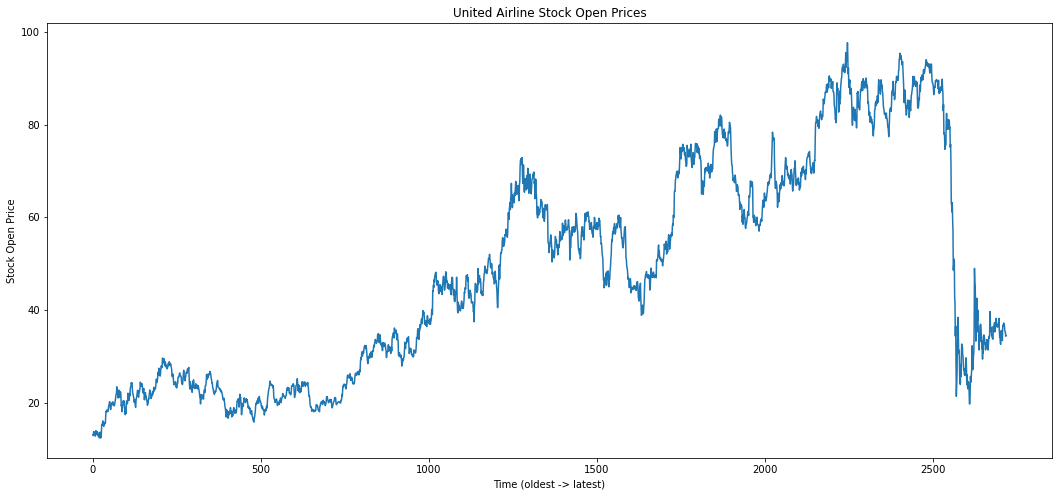

In [78]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("United Airline Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

#### 3.1 Feature scaling

In [79]:
# import os
# if os.path.exists('config.py'):
#     print(1)
# else:
#     print(0)

In [80]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)
print(len(training_set_scaled))

2718


#### 3.2 Data structure creation

- taking the reference of past 60 days of data to predict the future stock price.  
- It is observed that taking 60 days of past data gives us best results.  
- In this data set 60 days of data means 3 months of data.  
- Every month as 20 days of Stock price.   
- X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [81]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [82]:
X_train.shape

(2658, 60)

In [83]:
# # Class outcome
# cutoff = 0.5
# X_outcome = np.array([0 if x < cutoff else 1 for x in np.cumsum(X_train[443])])
# print(X_outcome)

In [84]:
y_train.shape

(2658,)

#### 3.3 Data reshaping

In [85]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449  
2. Number of time steps - 60  
3. Number of Indicator - 1  

In [86]:
X_train.shape

(2658, 60, 1)

### 4. Create & Fit Model

#### 4.1 Create model

In [87]:
model = Sequential()
#add 1st lstm layer
model.add((LSTM(50, input_shape=(X_train.shape[1], 1))))
# model.add(Bidirectional(LSTM(50, input_shape=(X_train.shape))))
model.add(Dropout(rate = 0.5))
model.add(Dropout(rate = 0.25))

##add output layer
model.add(Dense(1, activation='sigmoid'))

#model compiling
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)
# model.save("DAL-BiLSTM")

Epoch 1/100
84/84 [==============================] - 4s 27ms/step - loss: 0.0289 - accuracy: 3.7622e-04
Epoch 2/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0050 - accuracy: 3.7622e-04
Epoch 3/100
84/84 [==============================] - 2s 27ms/step - loss: 0.0041 - accuracy: 3.7622e-04
Epoch 4/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0035 - accuracy: 3.7622e-04
Epoch 5/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0034 - accuracy: 3.7622e-04
Epoch 6/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0031 - accuracy: 3.7622e-04
Epoch 7/100
84/84 [==============================] - 2s 25ms/step - loss: 0.0031 - accuracy: 3.7622e-04
Epoch 8/100
84/84 [==============================] - 2s 25ms/step - loss: 0.0028 - accuracy: 3.7622e-04
Epoch 9/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0028 - accuracy: 3.7622e-04
Epoch 10/100
84/84 [==============================] - 2s 23ms/st

#### 4.3 Model evaluation

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


#### 4.3.1 Read and convert

In [89]:
# dataset_test = pd.read_csv('UAL_test.csv')
# dataset_test = df[int(length*0.9):int(length*0.95)].copy()
dataset_test = df[int(length*0.9):int(length)].copy()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 2718 to 3019
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       302 non-null    object 
 1   Open       302 non-null    float64
 2   High       302 non-null    float64
 3   Low        302 non-null    float64
 4   Close      302 non-null    float64
 5   Adj Close  302 non-null    float64
 6   Volume     302 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.6+ KB


In [90]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2718,2020-10-20,36.160000,36.590000,35.200001,36.060001,36.060001,22578100
2719,2020-10-21,35.910000,36.139999,35.209999,35.540001,35.540001,16092700
2720,2020-10-22,35.900002,37.450001,35.650002,37.240002,37.240002,24747800
2721,2020-10-23,37.099998,38.099998,36.520000,38.009998,38.009998,20690300
2722,2020-10-26,37.369999,37.400002,34.669998,35.340000,35.340000,25924500


In [91]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
print(real_stock_price.shape)
print(real_stock_price[0])

(302, 1)
[36.15999985]


#### 4.3.2 Concat and convert

In [92]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

#### 4.3.3 Reshape and scale

In [93]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [94]:
len(inputs)
print(inputs.shape)

(362, 1)


#### 4.3.4 Create test data strucutre

In [95]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [96]:
X_test.shape
# print(X_test)

(302, 60, 1)

#### 4.3.5 Model prediction

In [97]:
predicted_stock_price = model.predict(X_test)
print(predicted_stock_price.shape)

(302, 1)


In [98]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### 4.3.6 Result visualization

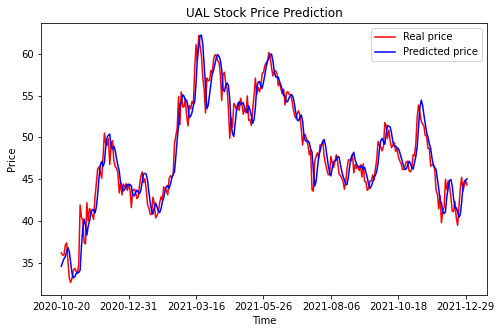

MSE: 2.8527773772613543
MAE: 1.3040356288682549
R^2: 0.9240775984287373


In [101]:
date = df['Date'].iloc[int(length*0.9):int(length)].values

plt.figure(figsize=(8,5))
plt.plot(date, real_stock_price, color = 'red', label = 'Real price')
plt.plot(date, predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('UAL Stock Price Prediction')
plt.xticks(np.arange(0,len(predicted_stock_price),50))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
print(f'MSE: {mean_squared_error(real_stock_price, predicted_stock_price)}')
print(f'MAE: {mean_absolute_error(real_stock_price, predicted_stock_price)}')
print(f'R^2: {r2_score(real_stock_price, predicted_stock_price)}')